# Decision Tree Classifier Assignment

### By Vishakan Subramanian, CSE-C, 18 5001 196

#### April 1, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score as bas, classification_report, confusion_matrix, matthews_corrcoef


!pip install category_encoders
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df = pd.read_csv("car_evaluation.csv")

In [4]:
#Dimensions of the dataset
df.shape

(1727, 7)

In [5]:
#Inserting appropriate column names into the dataframe
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
df.columns = col_names

for col in df.columns:
    print(df[col].value_counts(), "\n")

high     432
low      432
med      432
vhigh    431
Name: buying, dtype: int64 

high     432
low      432
med      432
vhigh    431
Name: maint, dtype: int64 

3        432
4        432
5more    432
2        431
Name: doors, dtype: int64 

more    576
4       576
2       575
Name: persons, dtype: int64 

big      576
med      576
small    575
Name: lug_boot, dtype: int64 

high    576
med     576
low     575
Name: safety, dtype: int64 

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64 



In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,more,big,high,unacc
freq,432,432,432,576,576,576,1209


In [8]:
#Check for missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
#Feature Vector & Target Variable
X = df.drop(['class'], axis=1)
y = df['class']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#Feature engineering, convert categorical data to numerical by encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X = encoder.fit_transform(X)

In [10]:
#Defining a K-Fold Cross Validation with 15 Folds
kf = KFold(n_splits=15, shuffle=True, random_state=2)

for train_index, test_index in kf.split(X):
    X_train = df.iloc[train_index].loc[:, features]
    X_test = df.iloc[test_index][features]
    y_train = df.iloc[train_index].loc[:,'class']
    y_test = df.loc[test_index]['class']

In [11]:
X_train.shape, X_test.shape

((1612, 6), (115, 6))

In [12]:
#Feature engineering, convert categorical data to numerical by encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [13]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


In [14]:
#Using the Decision Tree Classifier
gini_tree = DTC(random_state=2, criterion='gini', max_depth=11)

#Calculating Cross Validation Score
scores = cross_val_score(gini_tree, X, y, scoring='balanced_accuracy', cv=kf)

print("Cross-Validation Scores over 15 Folds:\n", scores, end="\n\n")
print("Average cross-validation balanced accuracy score:", round(np.mean(scores), 3) * 100, "%")

Cross-Validation Scores over 15 Folds:
 [0.99107143 0.9375     0.9        0.99679487 0.75       0.93981481
 0.98611111 0.94691358 0.93425325 0.95319418 0.98148148 0.9681418
 0.8        0.99683544 0.92987116]

Average cross-validation balanced accuracy score: 93.4 %


In [15]:
gini_tree.fit(X_train, y_train)
y_pred = gini_tree.predict(X_test)

In [16]:
print("Gini Tree Accuracy Score: {0:0.2f}%". format(accuracy_score(y_test, y_pred) * 100))
print("Gini Tree Balanced Accuracy Score: {0:0.2f}%". format(bas(y_test, y_pred) * 100))
print("Gini Tree MCC Score: {0:0.2f}%". format(matthews_corrcoef(y_test, y_pred) * 100))

Gini Tree Accuracy Score: 97.39%
Gini Tree Balanced Accuracy Score: 92.99%
Gini Tree MCC Score: 94.66%


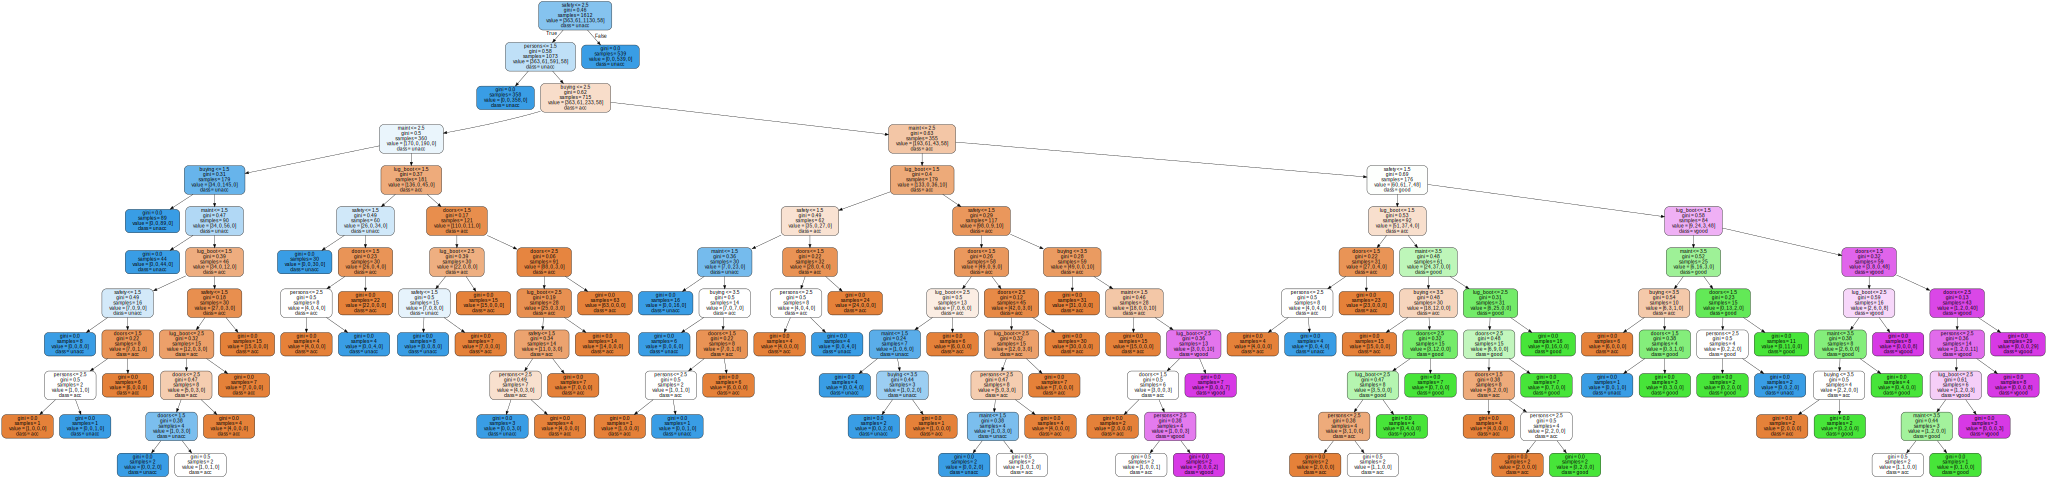

In [17]:
dot_data = export_graphviz(gini_tree, out_file=None, feature_names = X_train.columns,
                class_names = np.unique(y_train.values),
                rounded = True, proportion = False, precision = 2, filled = True)

graph = graphviz.Source(dot_data) 

#Exporting as png
graph.format = 'png'
graph.render('car_dtree',view=True)

graph

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.91      1.00      0.95        21
        good       1.00      0.88      0.93         8
       unacc       0.99      0.99      0.99        79
       vgood       1.00      0.86      0.92         7

    accuracy                           0.97       115
   macro avg       0.98      0.93      0.95       115
weighted avg       0.98      0.97      0.97       115



In [19]:
print(confusion_matrix(y_test, y_pred, labels=['acc', 'unacc', 'vgood', 'good']))

[[21  0  0  0]
 [ 1 78  0  0]
 [ 1  0  6  0]
 [ 0  1  0  7]]
